In [8]:
import os
import re
import json
import importlib
import datetime
import pprint
from scipy.spatial.distance import cdist
pp = pprint.PrettyPrinter(indent=4)
import helpers.vrt as vrt
import helpers.fmask as fmask
import numpy as np
import matplotlib.pyplot as plt
from helpers.variables import DATA_PATH

importlib.reload(vrt)
importlib.reload(fmask)

<module 'helpers.fmask' from '/Users/thomashebrard/thesis/code/helpers/fmask.py'>

In [193]:
############################################################
#############               BANDS              #############
############################################################


# BO2: Blue
# B03: Green
# B04: Red

name = "S2_32VNH_20200601" 
BANDS_PATH = f"{DATA_PATH}/s2/sre-10m/{name}"

bands = {
    "2": f"{BANDS_PATH}/{name}_B02.tif",
    "3": f"{BANDS_PATH}/{name}_B03.tif",
    "4": f"{BANDS_PATH}/{name}_B04.tif",
}

vrt_path = f"./{name}_vrt.vrt"

vrt.tif_to_vrt(images_path=list(bands.values()), vrt_output=vrt_path)
# image_array = vrt.display_vrt(vrt_path=vrt_path)

VRT build done.


OTHER METHOD

In [10]:
import rasterio

band_02 = rasterio.open(bands["2"])
band_03 = rasterio.open(bands["3"])
band_04 = rasterio.open(bands["4"])

red = band_04.read(1)
green = band_03.read(1)
blue = band_02.read(1)

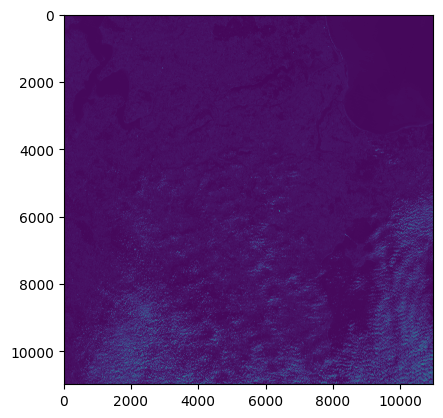

In [21]:
plt.imshow(green)
# The blueish image is basically an intensity map, where each pixel represents the 
# amount of reflected light that the Sentinel-2's sensor captured in the red band.
# The brighter pixels (higher values) represent more red content and the darker pixels 
# (lower values) represent less red content.

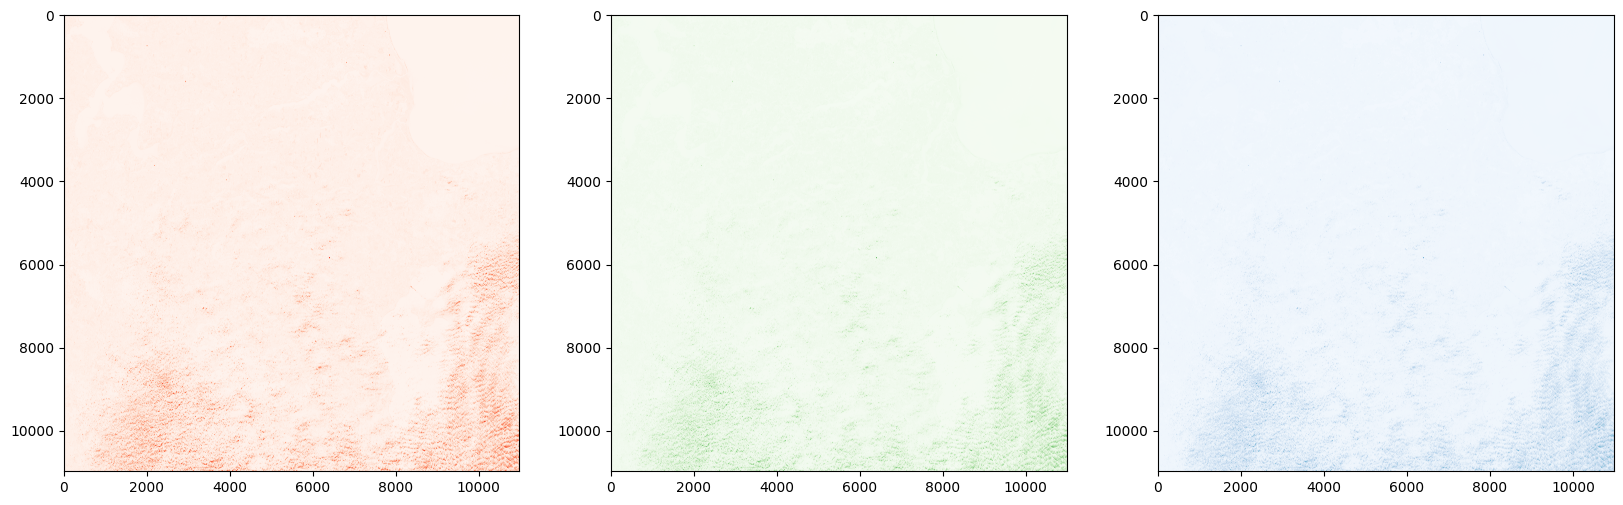

In [13]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(red, cmap='Reds')
ax1 = fig.add_subplot(1,3,2)
ax1.imshow(green, cmap='Greens')
ax1 = fig.add_subplot(1,3,3)
ax1.imshow(blue, cmap='Blues')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


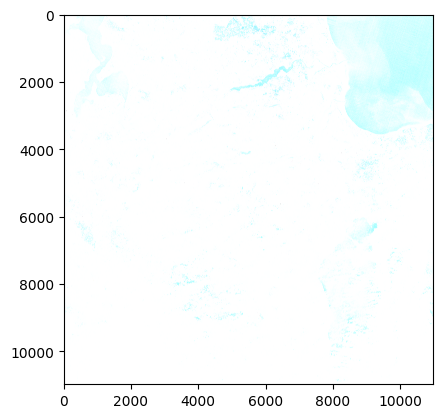

In [15]:
rgb_composite_raw = np.dstack((red, green, blue))
plt.imshow(rgb_composite_raw)

In [19]:
def normalize(band):
    band_min, band_max = (0, 2000)
    return ((band-band_min)/((band_max - band_min)))

red_n = normalize(red)
green_n = normalize(green)
blue_n = normalize(blue)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


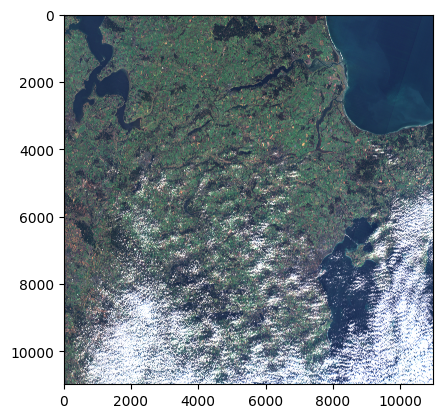

In [70]:
rgb_composite_n = np.dstack((red_n, green_n, blue_n))
plt.imshow(rgb_composite_n)

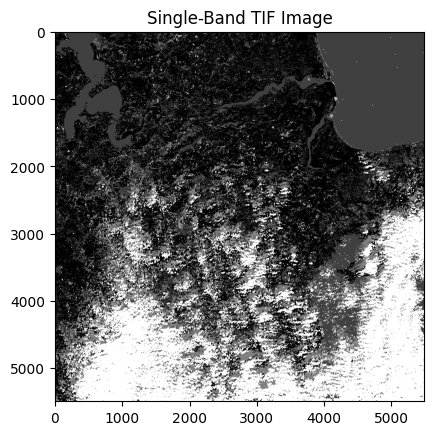

In [5]:
############################################################
#############               FMASK              #############
############################################################

FMASK_PATH = f"{DATA_PATH}/s2/fmask/S2_32VNH_20211218/S2_32VNH_20211218_fmask.tif"

fmask_array = fmask.display_fmask(tif_path=FMASK_PATH, show=True)